In [8]:
import torch
import pinn
from pinn import d as d
import matplotlib.pyplot as plt

In [9]:
sin, cos, pi = torch.sin, torch.cos, torch.pi

100%|██████████| epoch 1 of 1 (42.15epochs/s) | loss: 1.8618 | training time: 00:00
100%|██████████| epoch 1 of 1 (53.47epochs/s) | loss: 0.7078 | training time: 00:00
100%|██████████| epoch 1 of 1 (46.76epochs/s) | loss: 0.3237 | training time: 00:00
100%|██████████| epoch 1 of 1 (42.87epochs/s) | loss: 0.0148 | training time: 00:00
100%|██████████| epoch 1 of 1 (41.41epochs/s) | loss: 0.0018 | training time: 00:00
100%|██████████| epoch 1 of 1 (37.44epochs/s) | loss: 0.0010 | training time: 00:00
100%|██████████| epoch 1 of 1 (35.52epochs/s) | loss: 0.0011 | training time: 00:00
100%|██████████| epoch 1 of 1 (31.43epochs/s) | loss: 0.0006 | training time: 00:00
100%|██████████| epoch 1 of 1 (32.79epochs/s) | loss: 0.0004 | training time: 00:00
100%|██████████| epoch 1 of 1 (36.70epochs/s) | loss: 0.0003 | training time: 00:00
100%|██████████| epoch 1 of 1 (35.72epochs/s) | loss: 0.0003 | training time: 00:00
100%|██████████| epoch 1 of 1 (37.48epochs/s) | loss: 0.0002 | training time

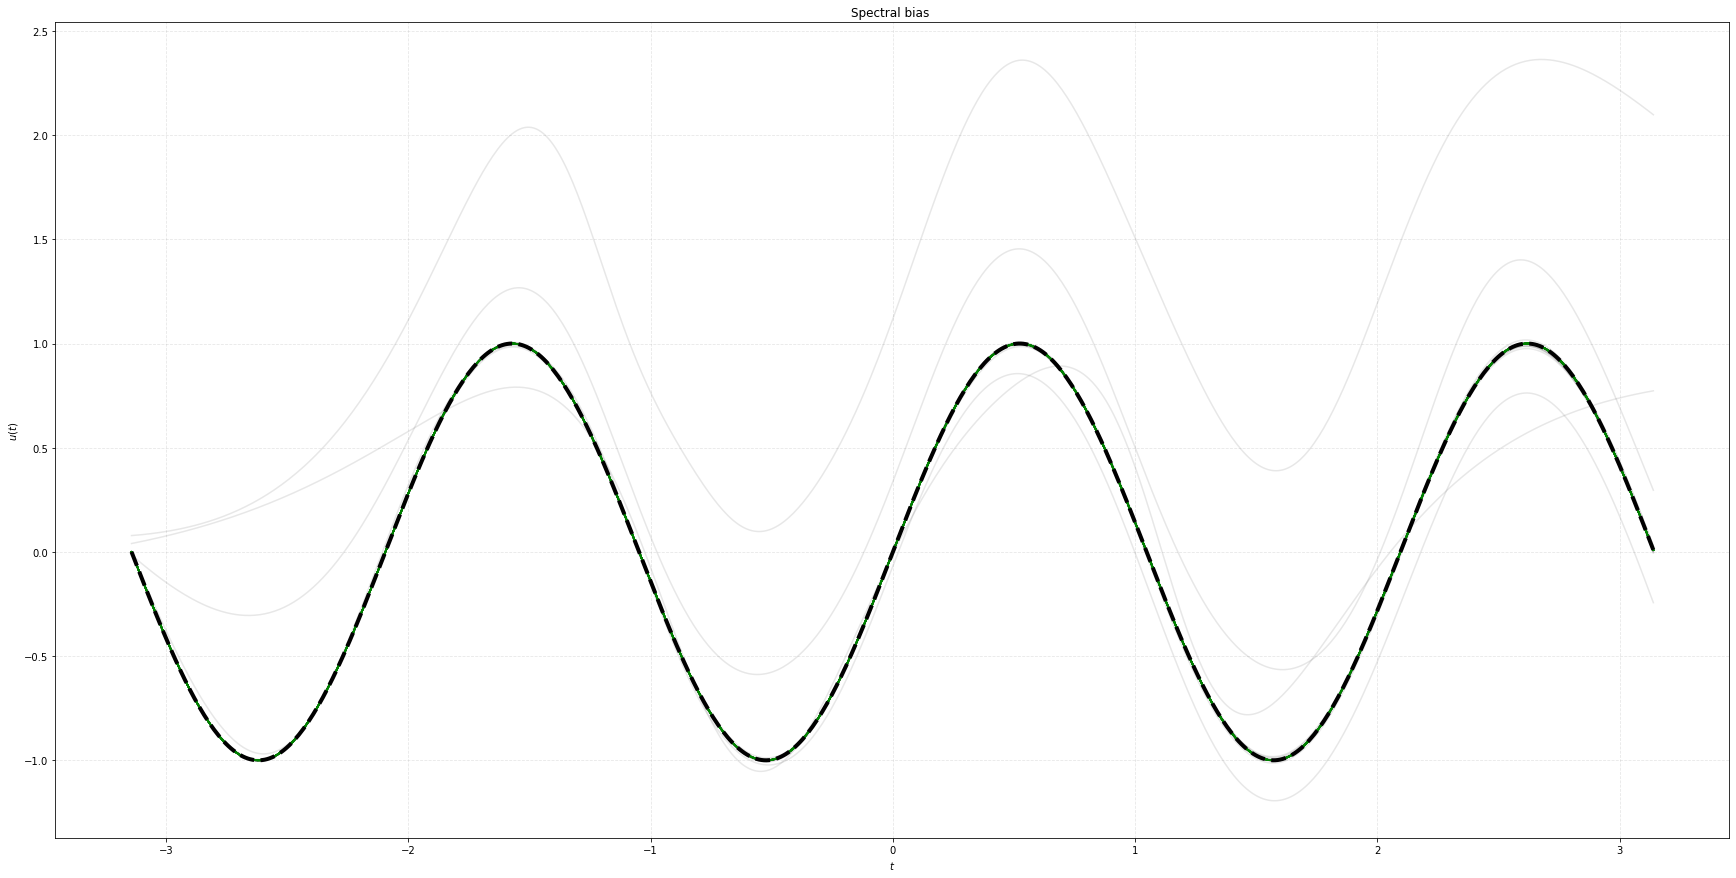

100%|██████████| epoch 1 of 1 (43.68epochs/s) | loss: 48.7604 | training time: 00:00
100%|██████████| epoch 1 of 1 (40.20epochs/s) | loss: 47.9581 | training time: 00:00
100%|██████████| epoch 1 of 1 (32.64epochs/s) | loss: 49.5892 | training time: 00:00
100%|██████████| epoch 1 of 1 (40.94epochs/s) | loss: 44.4027 | training time: 00:00
100%|██████████| epoch 1 of 1 (34.75epochs/s) | loss: 40.1785 | training time: 00:00
100%|██████████| epoch 1 of 1 (32.06epochs/s) | loss: 36.2467 | training time: 00:00
100%|██████████| epoch 1 of 1 (34.40epochs/s) | loss: 30.9205 | training time: 00:00
100%|██████████| epoch 1 of 1 (31.37epochs/s) | loss: 31.0409 | training time: 00:00
100%|██████████| epoch 1 of 1 (28.58epochs/s) | loss: 27.1461 | training time: 00:00
100%|██████████| epoch 1 of 1 (33.29epochs/s) | loss: 28.8862 | training time: 00:00
100%|██████████| epoch 1 of 1 (30.90epochs/s) | loss: 29.2035 | training time: 00:00
100%|██████████| epoch 1 of 1 (29.83epochs/s) | loss: 29.1574 | t

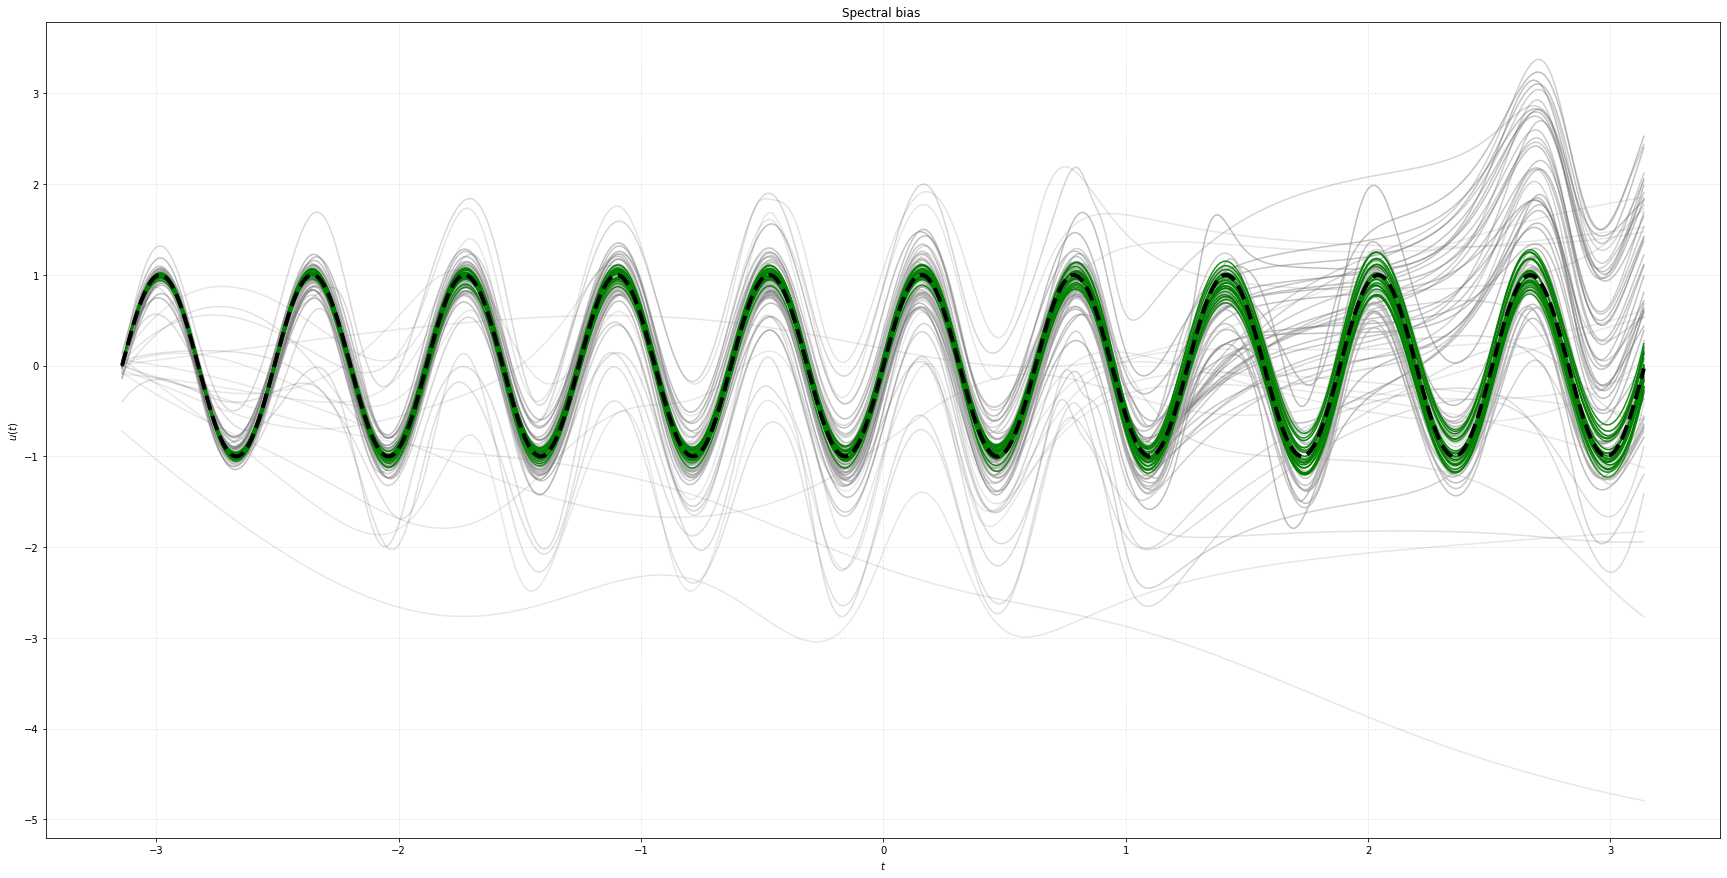

100%|██████████| epoch 1 of 1 (27.43epochs/s) | loss: 438.0379 | training time: 00:00
100%|██████████| epoch 1 of 1 (12.91epochs/s) | loss: 433.0401 | training time: 00:00
100%|██████████| epoch 1 of 1 (40.23epochs/s) | loss: 416.6189 | training time: 00:00
100%|██████████| epoch 1 of 1 (40.06epochs/s) | loss: 398.3336 | training time: 00:00
100%|██████████| epoch 1 of 1 (37.81epochs/s) | loss: 438.6669 | training time: 00:00
100%|██████████| epoch 1 of 1 (30.01epochs/s) | loss: 422.7310 | training time: 00:00
100%|██████████| epoch 1 of 1 (28.29epochs/s) | loss: 396.3915 | training time: 00:00
100%|██████████| epoch 1 of 1 (29.08epochs/s) | loss: 377.6010 | training time: 00:00
100%|██████████| epoch 1 of 1 (29.66epochs/s) | loss: 375.1598 | training time: 00:00
100%|██████████| epoch 1 of 1 (29.94epochs/s) | loss: 357.0250 | training time: 00:00
100%|██████████| epoch 1 of 1 (30.52epochs/s) | loss: 387.2313 | training time: 00:00
100%|██████████| epoch 1 of 1 (27.95epochs/s) | loss: 

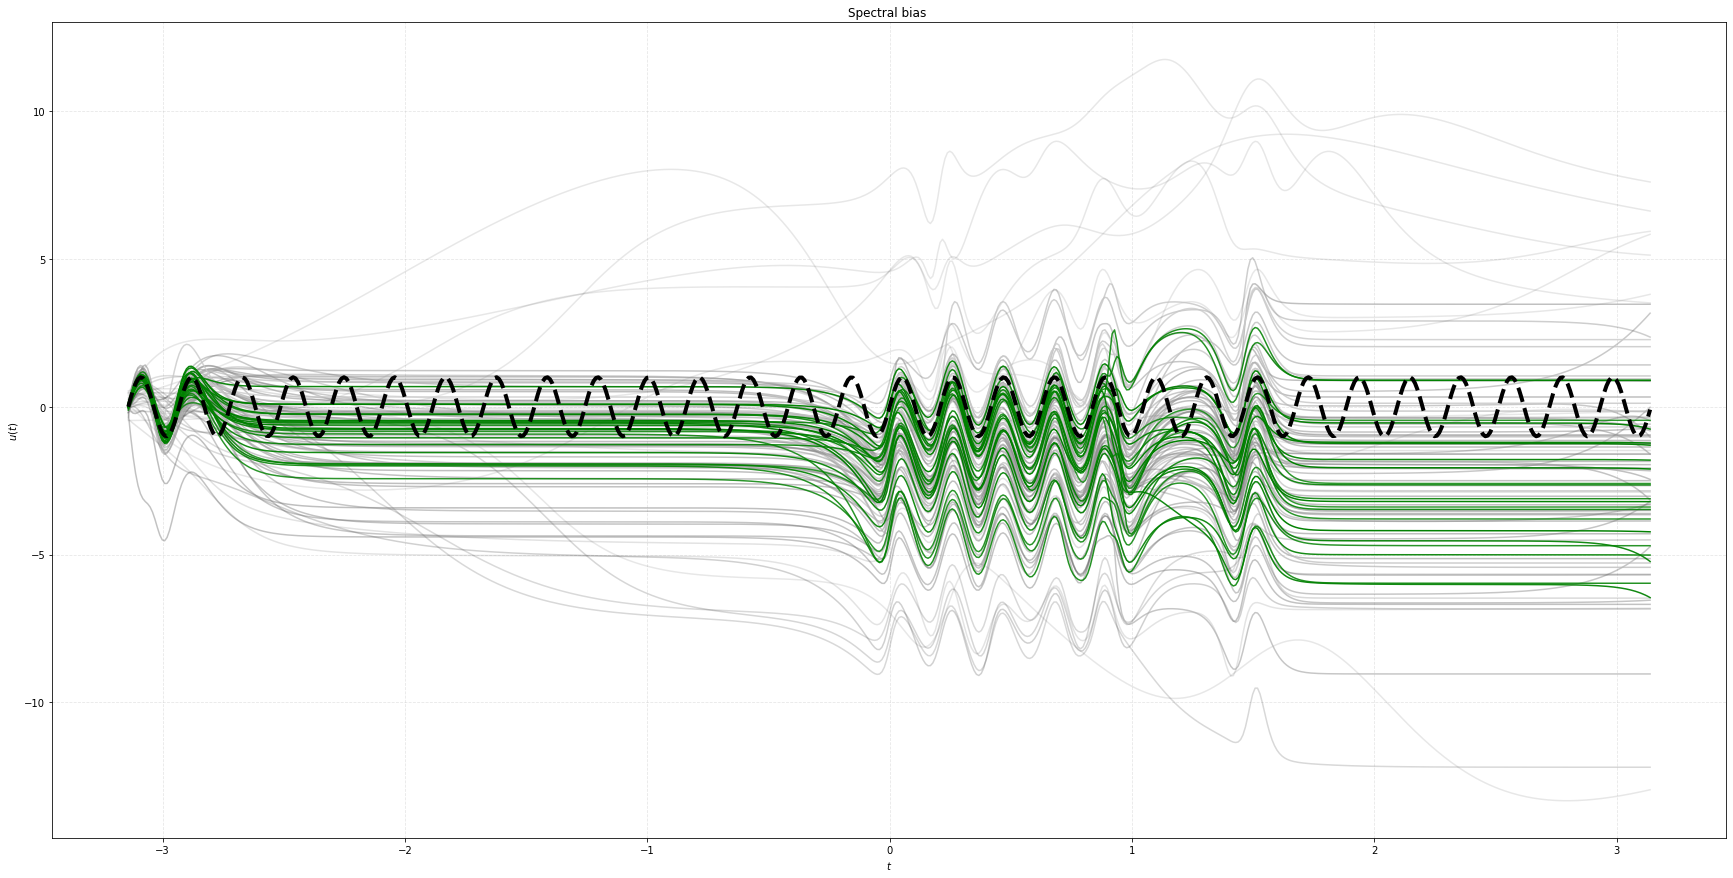

In [131]:
w = 10

def equation(data, solution):
    u = solution[0]
    t = data['t']
    eq = d(u, t) - w*cos(w*t)
    return (eq, )

def initial_condition(data, solution):
    u = solution[0]
    ic = u
    return (ic, )

def analytical_solution(data):
    t = data['t']
    sol = sin(t**2)
    return (sol, )

# Objects:

pde = pinn.PDE(equation=equation,
          domain={'t': [-pi, pi]},
          initial_condition=initial_condition,
          analytical_solution=analytical_solution)


for w in (3, 10, 30):

    net = pinn.NeuralNetwork(n_variables=1,
                        n_output=1,
                        n_layers=2,
                        wide=20)

    optimizer = torch.optim.LBFGS(net.parameters(), line_search_fn='strong_wolfe')
    trainer = pinn.Trainer(pde, net, optimizer)

    # Plotting:

    plt.figure(figsize=(30, 15))

    input = {'t': torch.arange(*pde.domain['t'], 1e-2)}

    n_epochs = 100

    for epoch in range(1, n_epochs + 1):
        trainer.train(epochs=1)
        u_pred = net(input)[0].detach()
        alpha = epoch/float(n_epochs) if epoch/float(n_epochs) > 0.1 else 0.1
        color = str(alpha) if epoch < 4*n_epochs/5 else 'greeen'
        plt.plot(input['t'], u_pred, label=f'Epoch {epoch}', alpha=alpha, color=color)

    u_real = pde.analytical_solution(input)[0]
    plt.plot(input['t'], u_real, alpha=1, linewidth=4, color='k', linestyle='--')

    plt.grid(alpha=0.3, linestyle='--')
    plt.xlabel('$t$'); plt.ylabel('$u(t)$')
    plt.title('Spectral bias ')
    plt.show()
